# DIABETES CLASSIFIER

In [1]:
# Library for Dataframe
import pandas as pd
import numpy as np

# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Librabries for Metric / model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [55]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dbt = pd.read_csv('Datasets/diabetes_data.csv')
# dbt.head(5)
dbt.shape

(70692, 18)

## EDA (Exploratory Data Analysis)

In [3]:
dbt.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dbt.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

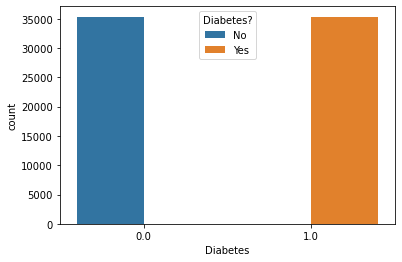

In [5]:
label_plot = sns.countplot(data=dbt, x='Diabetes', hue='Diabetes')

plt.legend(title='Diabetes?', loc='upper center', labels=['No', 'Yes'])
plt.show(label_plot)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>],
       [<AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Stroke'}>],
       [<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'Diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

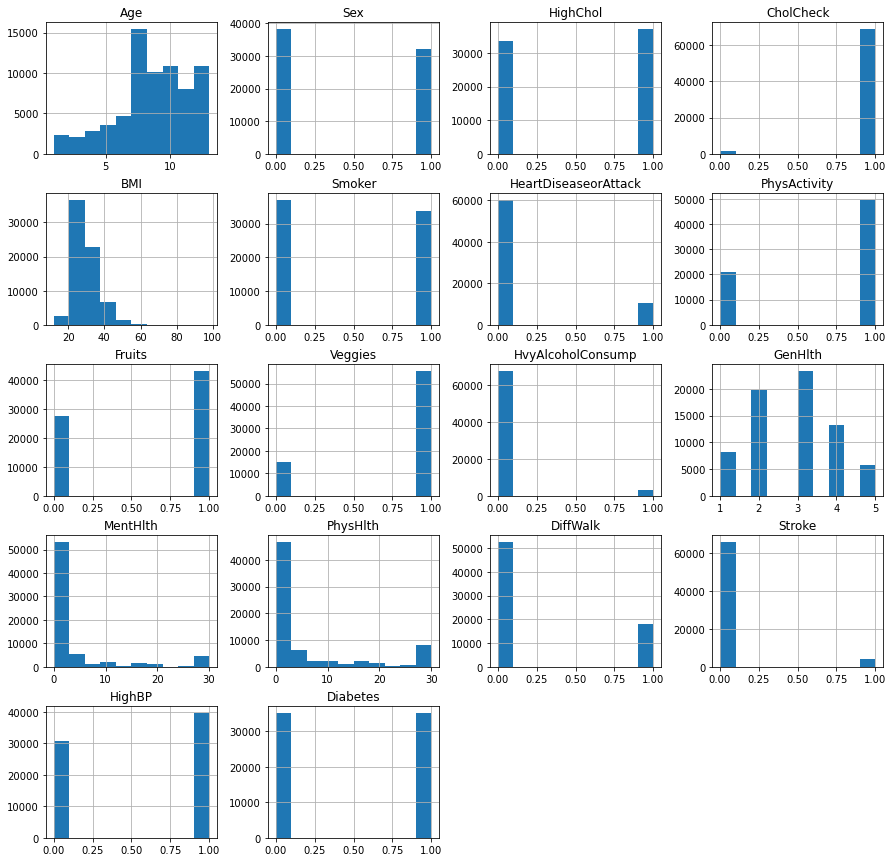

In [11]:
dbt.hist(figsize=(15,15))

<AxesSubplot:>

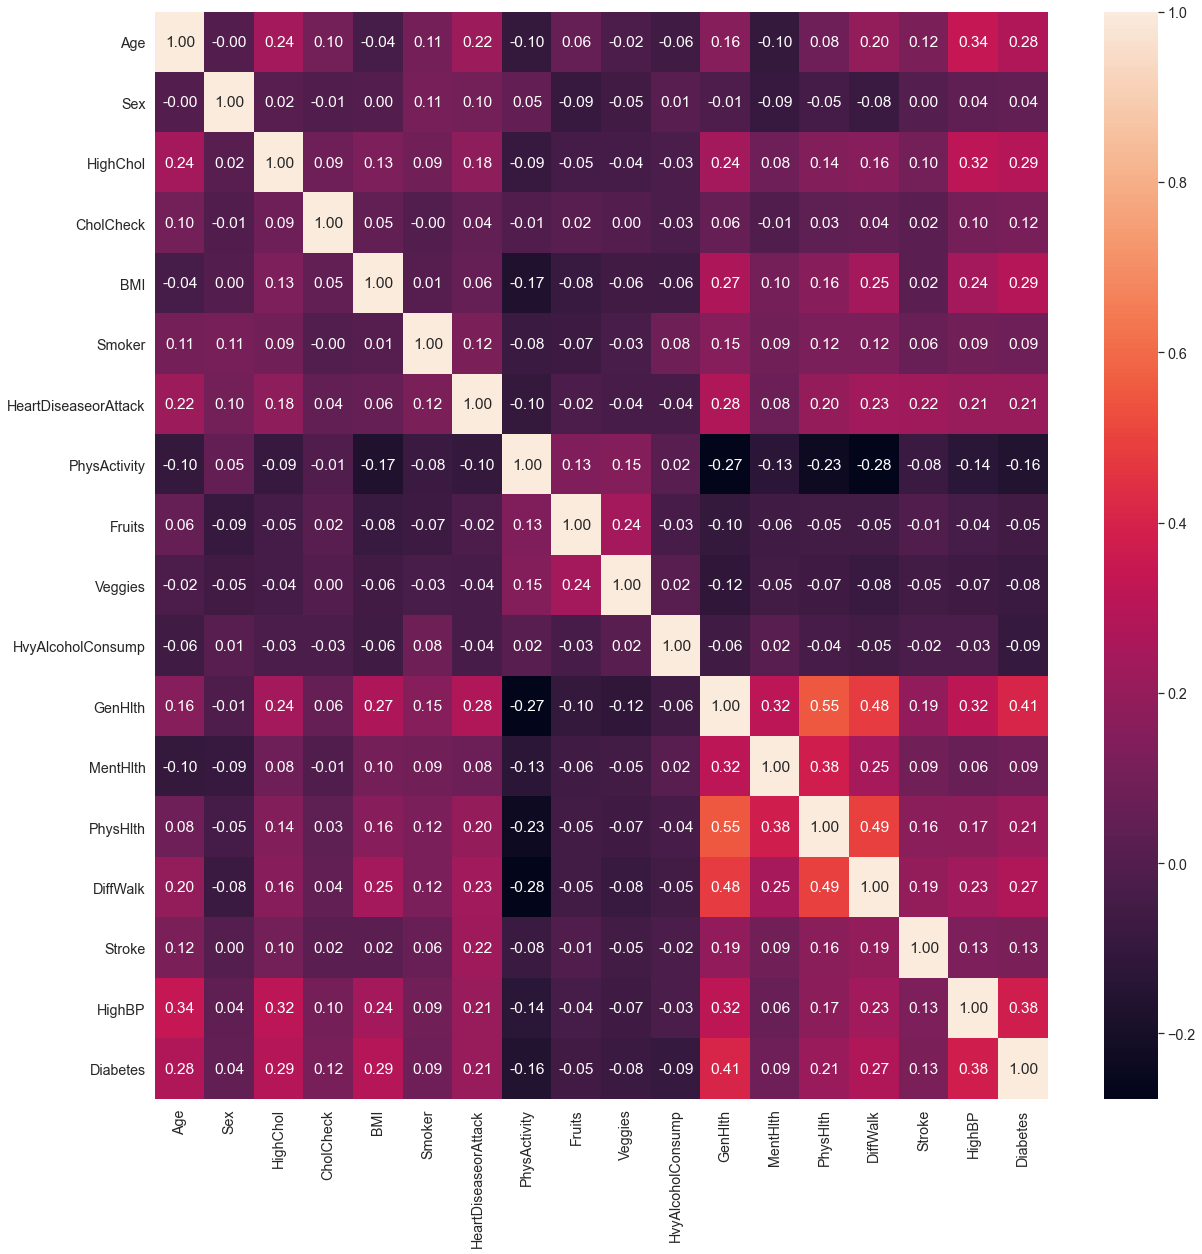

In [27]:
# Heat map for correlation between features

dbt_corr = dbt.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1.3)
sns.heatmap(dbt_corr, annot=True, fmt=".2f")

## Splitting the data to feature and label

In [30]:
feat = dbt.drop(['Diabetes'], axis=1).values
lab = dbt[['Diabetes']].values

In [31]:
from sklearn.preprocessing import StandardScaler

# Define the standard scaler
scaler = StandardScaler()

# transform the feature
scaled_feat = scaler.fit_transform(feat)
scaled_feat

array([[-1.60723742,  1.09004602, -1.05279808, ..., -0.58155367,
        -0.25747348,  0.88020109],
       [ 1.19768093,  1.09004602,  0.94984976, ..., -0.58155367,
         3.88389516,  0.88020109],
       [ 1.54829572,  1.09004602, -1.05279808, ..., -0.58155367,
        -0.25747348, -1.13610402],
       ...,
       [ 1.54829572, -0.91739246,  0.94984976, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.84706614, -0.91739246,  0.94984976, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.14583655, -0.91739246,  0.94984976, ..., -0.58155367,
        -0.25747348,  0.88020109]])

In [32]:
from sklearn.model_selection import train_test_split

# Import all required models from library
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Import all required models from library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

## Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(feat, lab, test_size=0.2, random_state=56)

## Comparing ML algorithm with cross validation

In [34]:
models = []

models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Multinomial NB', MultinomialNB()))
models

[('LR', LogisticRegression(max_iter=1000)),
 ('KNN', KNeighborsClassifier(n_neighbors=2)),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier()),
 ('Multinomial NB', MultinomialNB())]

In [35]:
results = []
names = []

kf = KFold(n_splits = 10)

for name, model in models:
    crossVal_res = cross_val_score(model, X_train, np.ravel(y_train), cv=kf, scoring='accuracy')
    results.append(crossVal_res)
    names.append(name)
    print("%s: %f (%f)" % (name, crossVal_res.mean(), crossVal_res.std()))

LR: 0.746680 (0.005822)
KNN: 0.644156 (0.006515)
Decision Tree: 0.657224 (0.007342)
Random Forest: 0.726151 (0.005133)
Multinomial NB: 0.594752 (0.003189)


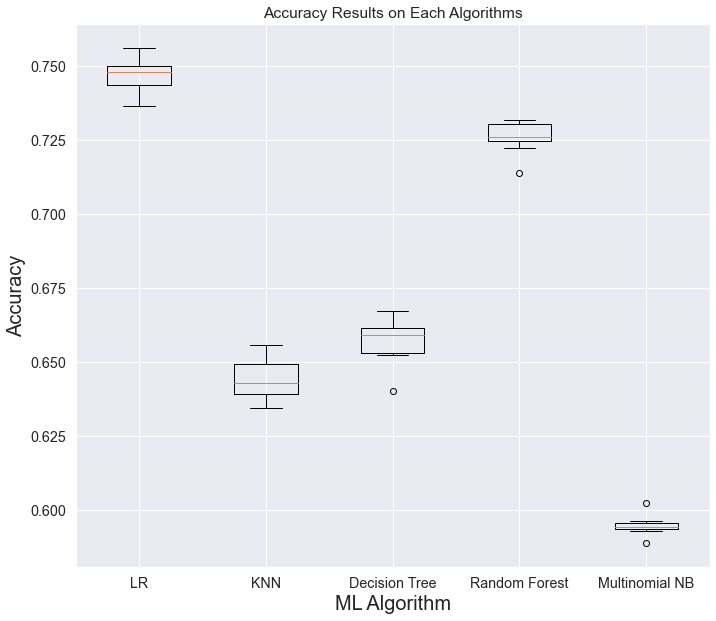

In [58]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(121)
plt.title('Accuracy Results on Each Algorithms')
ax = ax.set_xticklabels(names)
plt.boxplot(results)
plt.xlabel('ML Algorithm', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

## Predict the data with all the models

In [15]:
for name, model in models:
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-----------------------------------------------------')

LR
0.7492750548129288
[[5233 1908]
 [1637 5361]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      7141
         1.0       0.74      0.77      0.75      6998

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

-----------------------------------------------------
KNN
0.6474290968243864
[[5876 1265]
 [3720 3278]]
              precision    recall  f1-score   support

         0.0       0.61      0.82      0.70      7141
         1.0       0.72      0.47      0.57      6998

    accuracy                           0.65     14139
   macro avg       0.67      0.65      0.64     14139
weighted avg       0.67      0.65      0.64     14139

-----------------------------------------------------
Decision Tree
0.6632718014003819
[[4917 2224]
 [2537 4461]]
              precision    recall  f1-score   support

         0.0       0.66 

Based on the result above, could be concluded that Logistic Regression have the best performance. Therefore, it will be the choice to fit with the training and test set for predicting the Diabetes data.